In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.listdir('../input')

['sample_submission.csv',
 'test.csv',
 'test_original.csv',
 'train.csv',
 'train_original.csv']

In [3]:
train = pd.read_csv('../input/train_original.csv')
test = pd.read_csv('../input/test_original.csv')

# data info

In [4]:
print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (15035, 21)
test shape :  (6468, 20)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
id               6468 non-null int64
date             6468 non-null object
bedrooms         6468 non-null int64
bathrooms        6468 non-null float64
sqft_living      6468 non-null int64
sqft_lot         6468 non-null int64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null int64
sqft_basement    6468 non-null int64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null int64
sqft_lot15       6468 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 1010.7+ KB


In [7]:
train.iloc[:,1:].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
test.iloc[:,1:].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6468.00000,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,3.37786,2.118313,2075.981293,1.469916e+04,1.488327,0.008658,0.235467,3.416821,7.655535,1779.556277,296.425015,1970.949443,86.933983,98077.587044,47.558726,-122.214039,1974.429654,12659.800402
std,0.99064,0.775851,910.613001,3.870428e+04,0.544007,0.092652,0.773616,0.658267,1.161900,820.834051,447.218709,29.292377,407.210870,53.936590,0.139659,0.139766,671.597761,26380.422371
min,0.00000,0.000000,370.000000,6.810000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.512000,460.000000,748.000000
25%,3.00000,1.750000,1420.000000,5.084000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.467175,-122.327000,1480.000000,5100.000000
50%,3.00000,2.250000,1920.000000,7.607000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.572150,-122.229000,1820.000000,7664.500000
75%,4.00000,2.500000,2520.000000,1.066425e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,590.000000,1997.000000,0.000000,98118.000000,47.677400,-122.123000,2370.000000,10125.000000
max,33.00000,6.750000,9640.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.364000,5610.000000,438213.000000


# NA 
- 하나도 없음

In [9]:
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
test.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns

## Key Columns -id

In [12]:
print('train의 데이터 개수와 id unique 값 동일') if len(train.id.unique()) == train.shape[0] else print('다르다')
print('test의 데이터 개수와 id unique 값 동일') if len(test.id.unique()) == test.shape[0] else print('다르다')

train의 데이터 개수와 id unique 값 동일
test의 데이터 개수와 id unique 값 동일


In [13]:
print('train, test id 겹치는 id가 없다.') if len(set(train.id).intersection(set(test.id))) == 0 else print('겹친다')

train, test id 겹치는 id가 없다.


In [14]:
print('train id {}부터 {}까지 {}개'.format(train.id[0], train.id.iloc[-1], len(train.id)))
print('test id {}부터 {}까지 {}개'.format(test.id[0], test.id.iloc[-1], len(test.id)))

train id 0부터 15034까지 15035개
test id 15035부터 21502까지 6468개


## target column - price

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

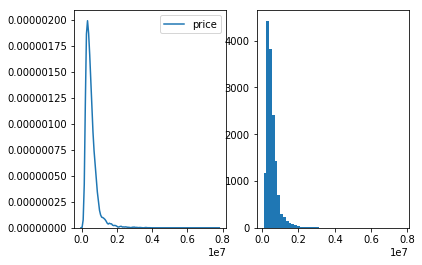

In [17]:
plt.subplot(1,2,1)
sns.kdeplot(train['price'])

plt.subplot(1,2,2)
plt.hist(train['price'], bins=50)
plt.show()

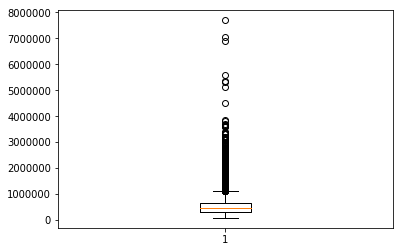

In [18]:
plt.boxplot(train['price'])
plt.show()

- target에 log 취하기

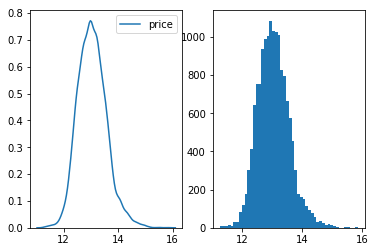

In [19]:
plt.subplot(1,2,1)
sns.kdeplot(np.log(train['price']))

plt.subplot(1,2,2)
plt.hist(np.log(train['price']), bins=50)
plt.show()

## features

In [25]:
#df : train과 test cocnat
df = pd.concat([train.drop('price', axis = 1),test])

### date

In [21]:
#T000000 아닌 값이 없다.
for st in df.date :
    if st[8:] != 'T000000' :
        print(st)

In [22]:
#year
train['year'] = train['date'].map(lambda x : x[:4]).astype(int)
test['year'] = test['date'].map(lambda x : x[:4]).astype(int)
#month
train['month'] = train['date'].map(lambda x : x[4:6]).astype(int)
test['month'] = test['date'].map(lambda x : x[4:6]).astype(int)
#day
train['day'] = train['date'].map(lambda x : x[6:8]).astype(int)
test['day'] = test['date'].map(lambda x : x[6:8]).astype(int)

#date
train['date'] = train['date'].map(lambda x : x[:8])
test['date'] = test['date'].map(lambda x : x[:8])

train['date'] = pd.to_datetime(train['date'], format="%Y%m%d")
test['date'] = pd.to_datetime(test['date'], format="%Y%m%d")

In [30]:
#train.to_csv('../input/train.csv', index = False)
#test.to_csv('../input/test.csv', index = False)

In [23]:
features = train.drop(['id','price'], axis = 1).columns
len(features)

22

In [26]:
print('train 날짜 {}부터 {}까지'.format(train.date.min(), train.date.max()))
print('test 날짜 {}부터 {}까지'.format(test.date.min(), test.date.max()))
print('전체 날짜 {}부터 {}까지'.format(df.date.min(), df.date.max()))

train 날짜 2014-05-02 00:00:00부터 2015-05-14 00:00:00까지
test 날짜 2014-05-02 00:00:00부터 2015-05-27 00:00:00까지
전체 날짜 2014-05-02 00:00:00부터 2015-05-27 00:00:00까지


### features histogram

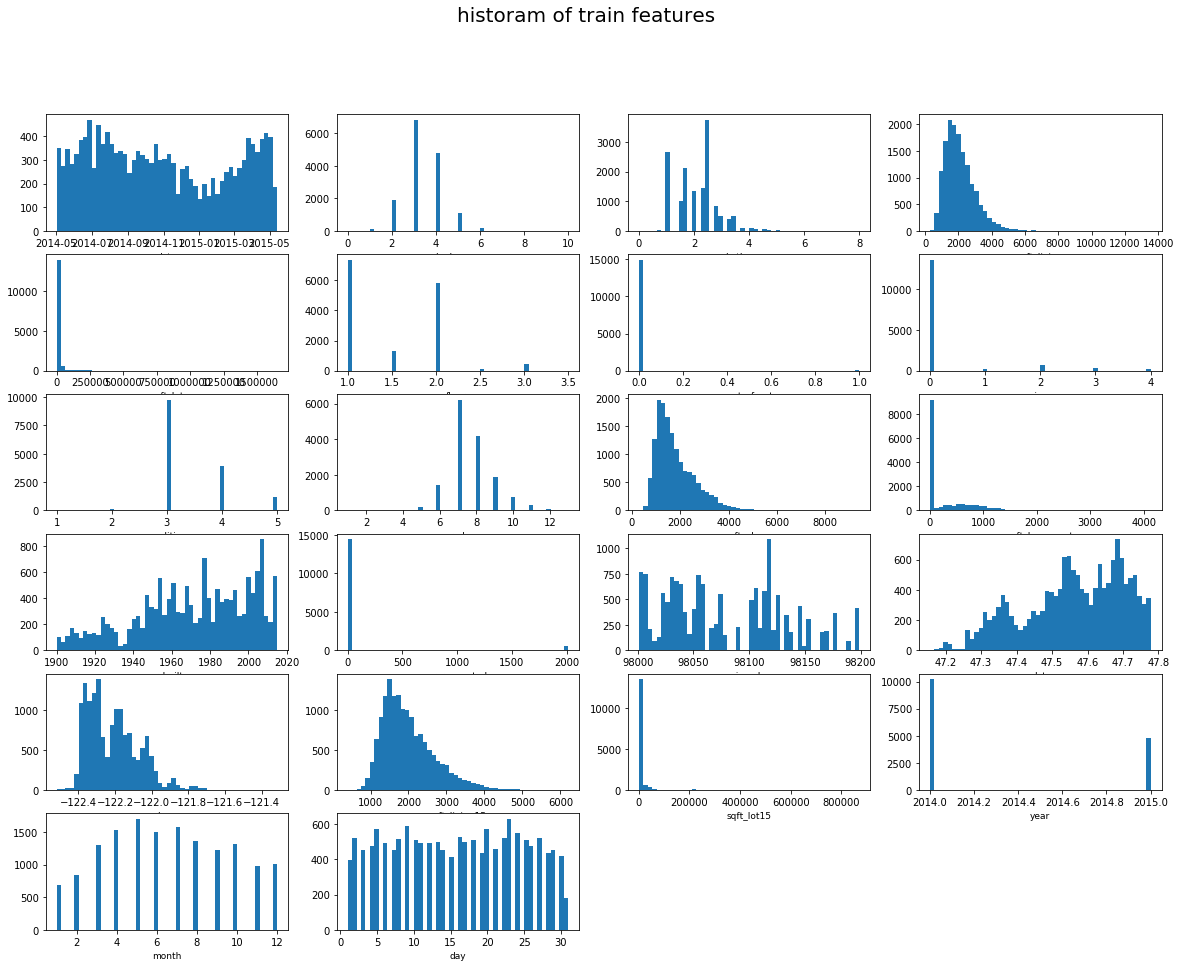

In [27]:
plt.figure(figsize = (20,15))

for i in range(len(features)) :
    plt.subplot(6,4,i+1)
    plt.hist(train[features[i]], bins = 50)
    
    plt.xlabel(features[i],fontsize=9)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x',which='major',labelsize = 10)
    plt.tick_params(axis='y',which='major',labelsize = 10)

plt.suptitle('historam of train features', size = 20)
plt.show()

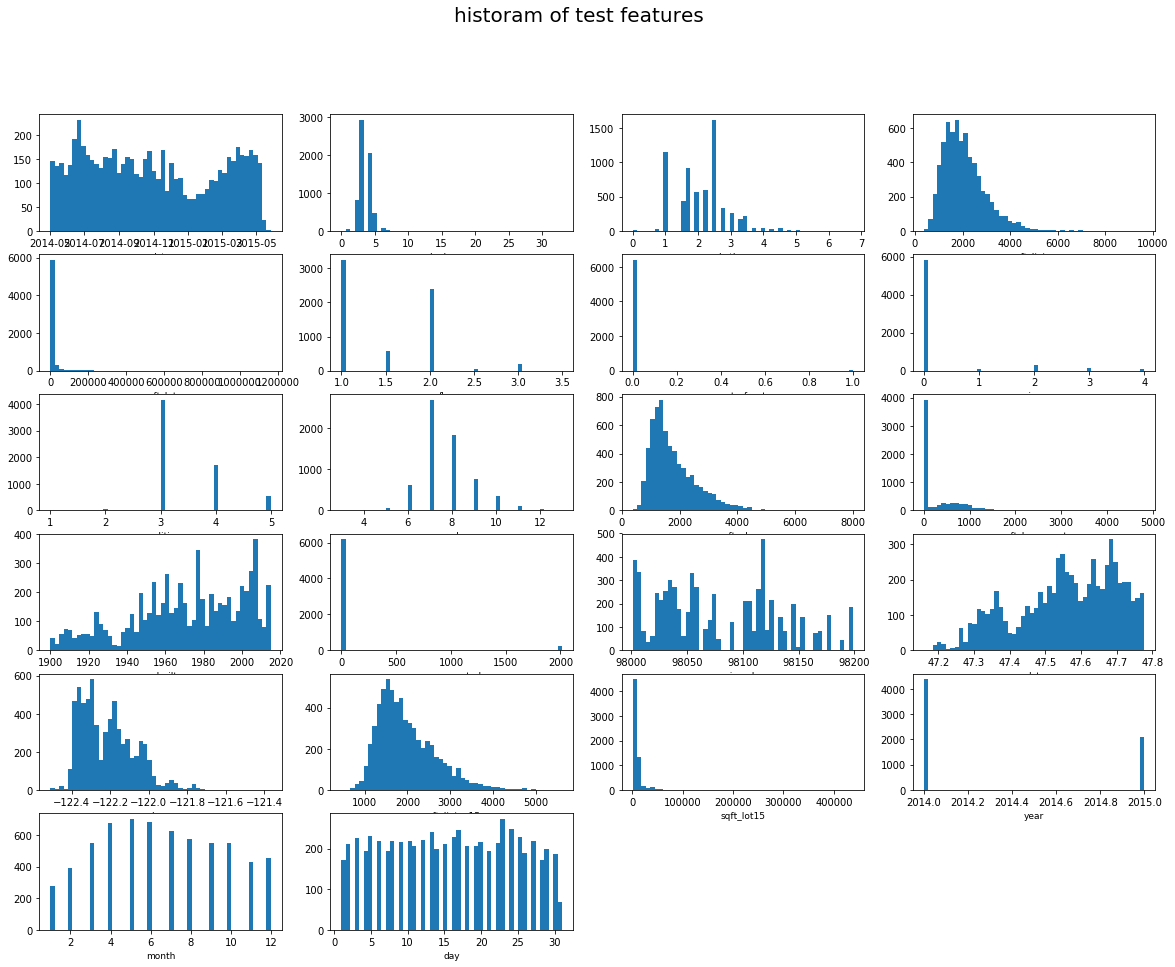

In [28]:
plt.figure(figsize = (20,15))

for i in range(len(features)) :
    plt.subplot(6,4,i+1)
    plt.hist(test[features[i]], bins = 50)
    
    plt.xlabel(features[i],fontsize=9)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x',which='major',labelsize = 10)
    plt.tick_params(axis='y',which='major',labelsize = 10)

plt.suptitle('historam of test features', size = 20)
plt.show()

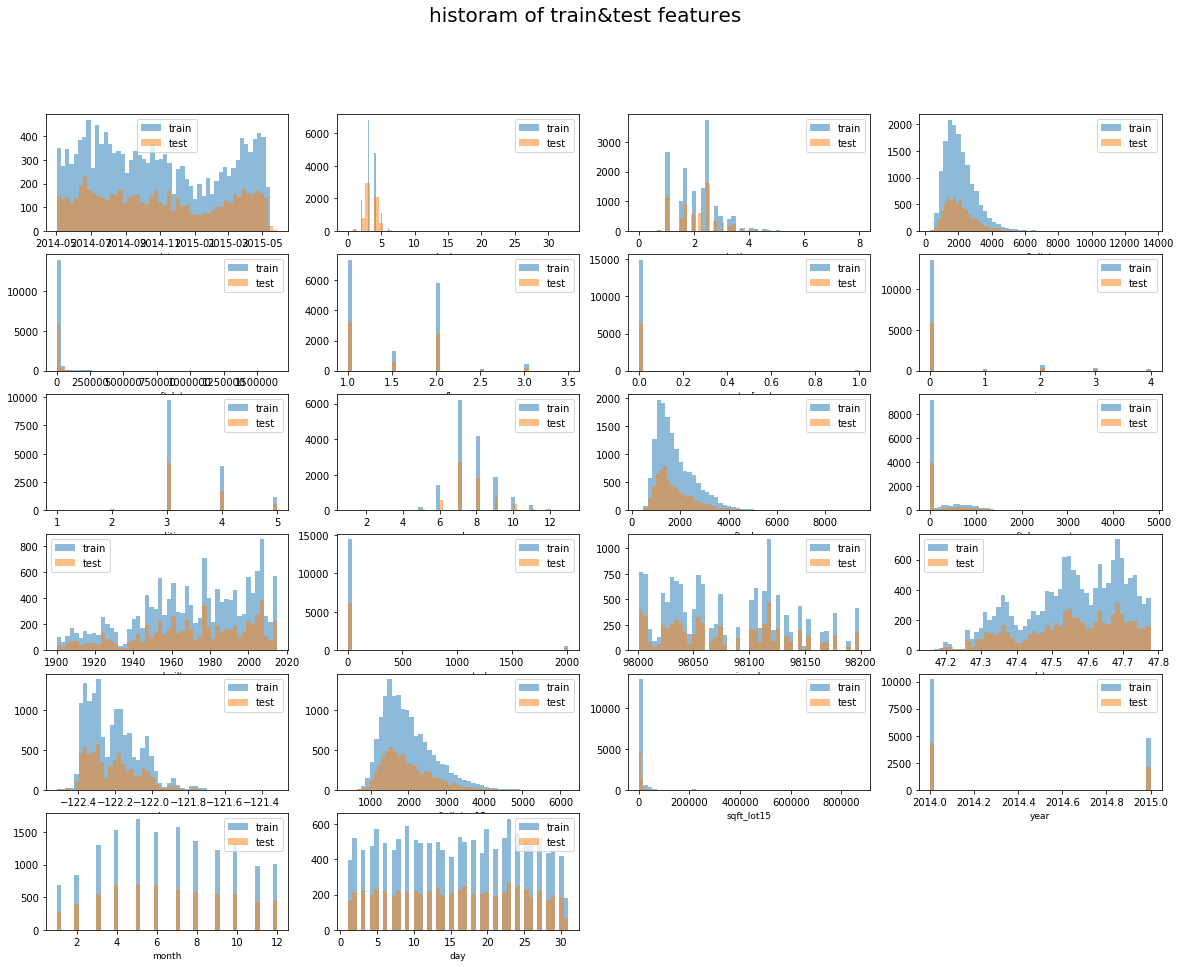

In [29]:
plt.figure(figsize = (20,15))

for i in range(len(features)) :
    plt.subplot(6,4,i+1)
    plt.hist(train[features[i]], bins = 50, label = 'train', alpha = 0.5)
    plt.hist(test[features[i]], bins = 50, label = 'test', alpha = 0.5)
    plt.xlabel(features[i],fontsize=9)
    
    locs, labels = plt.xticks()
    plt.tick_params(axis='x',which='major',labelsize = 10)
    plt.tick_params(axis='y',which='major',labelsize = 10)
    plt.legend()
plt.suptitle('historam of train&test features', size = 20)
plt.show()

train, test가 비슷한 분포를 보이는 것을 알 수 있다.